# Regresión Lineal

## SO2 Dióxido de Azufre

In [1]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_csv('../../datos/promedios_mensuales/SO2_mensual.csv')
df.head()

,fecha,noreste_dioxido_de_azufre,suroeste_dioxido_de_azufre,noroeste_dioxido_de_azufre,sureste_dioxido_de_azufre,centro_dioxido_de_azufre
0,2005-01-31,17.502688,13.668011,19.295699,13.965091,18.014785
1,2005-02-28,15.058036,7.590774,12.596726,7.971726,11.581845
2,2005-03-31,18.165323,9.509409,12.700269,10.170699,12.271505
3,2005-04-30,29.266667,10.584722,22.769444,12.011111,17.109722
4,2005-05-31,14.360215,6.223118,11.712366,6.356183,9.802419


In [3]:
# Convirtiendo la fecha
import datetime as dt
df['fecha'] = pd.to_datetime(df['fecha'])
df['fecha'] = df['fecha'].map(dt.datetime.toordinal)

In [11]:
def obtener_regresion(X, y, zona, fecha_pred):
    print(f"\nRegresión Lineal para Dióxido de Azufre (SO2) en {zona}")
    # Dividiendo conjunto de entrenamiento y prueba
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    
    # Entrenando al modelo
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    print(f"Score del Modelo: {lr.score(X_train, y_train)}")
    
    # Ajustar la regresión polinomica con el dataset
    from sklearn.preprocessing import PolynomialFeatures
    # Grado del Polinomio, 
    poly_regresion = PolynomialFeatures(degree = 4)
    X_poli = poly_regresion.fit_transform(X)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poli, y)
    print(f"Score del Modelo Polinomial: {lin_reg_2.score(X_poli, y)}")
    
    # Evaluando modelo de regresión lineal
    y_pred = lr.predict(X_test)
    
    print(" ### Resultados ###")
    print("Conjunto de prueba (test)")
    print(y_test)
    print("Predicción")
    print(y_pred)
    
    # Obteniendo predicción de la fecha ingresada
    fecha = fecha_pred
    fecha_pred = pd.to_datetime(fecha_pred)
    fecha_pred = dt.datetime.toordinal(fecha_pred)
    resultado = lr.predict([[fecha_pred]])
    
    # Visualizar los resultados de entrenamiento
    plt.scatter(X_train, y_train, color = "red")
    plt.plot(X_train, lr.predict(X_train), color = "blue")
    # Convirtiendo la fecha
    formatter = FuncFormatter(lambda x, pos: dt.datetime.strftime(dt.datetime.fromordinal(int(x)), '%Y'))
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.title("Contaminación de Dióxido de Azufre en " + zona + " (Entrenamiento)")
    plt.xlabel("Fecha")
    plt.ylabel("Nivel de Contaminación")
    plt.show()
    
    # Visualización de los resultados del Modelo Polinomial
    plt.scatter(X, y, color = "red")
    plt.plot(X, lin_reg_2.predict(poly_regresion.fit_transform(X)), color = "blue")
    # Convirtiendo la fecha
    formatter = FuncFormatter(lambda x, pos: dt.datetime.strftime(dt.datetime.fromordinal(int(x)), '%Y'))
    plt.gca().xaxis.set_major_formatter(formatter)
    plt.title('Modelo de Regresión Polinómica')
    plt.ylabel('Nivel de contaminación')
    plt.xlabel('Fecha')
    plt.show()
    
    print(f"La predicción para la fecha ingresada: {fecha} en la zona {zona} fue de {resultado}")

In [12]:
def obtener_prediccion(fecha_pred):
    X = df.iloc[:,0].values
    X = X.reshape(-1,1)
    zonas = ["Noreste", "Suroeste", "Noroeste", "Sureste", "Centro"]
    for i in range(1,6):
        obtener_regresion(X, df.iloc[:,i].values, zonas[i-1], fecha_pred)
    


Regresión Lineal para Dióxido de Azufre (SO2) en Noreste
Score del Modelo: 0.10783172149330489
Score del Modelo Polinomial: 0.38491803768044774
 ### Resultados ###
Conjunto de prueba (test)
[ 5.53091398  6.81989247  4.13172043  8.57291667  4.48521505  8.51478495
  7.66801075  5.40625     4.6875      7.65456989 10.5         5.33064516
  5.61962366  9.09005376  5.49462366  7.52956989  8.14798851  5.02016129
  4.93413978  4.34274194  4.77916667  7.78091398  4.82795699  8.89516129
 11.90053763  5.52638889  5.24305556  7.63844086  3.35833333  8.73387097
 14.36021505  5.64650538 13.29032258  5.20138889  6.69489247  8.12634409
 13.85416667 16.59811828  5.13194444]
Predicción
[7.22919352 7.97385953 6.13257769 7.49825168 6.89830634 8.03500912
 9.13162494 6.25759461 6.50559014 9.35855783 9.4006831  6.62856874
 6.23653198 5.98853646 6.19508615 6.04968604 8.73890874 8.1389634
 6.64963138 6.981198   8.3455131  5.6359072  6.6910772  5.73986149
 5.55301555 6.36019002 8.20147187 8.26194201 6.17470296

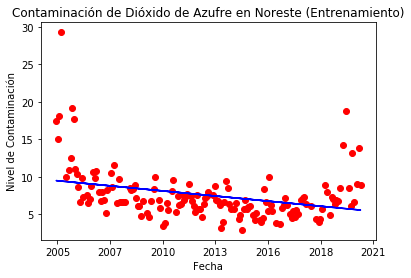

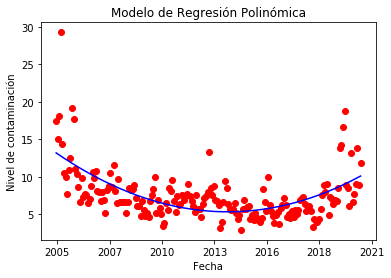

La predicción para la fecha ingresada: 2022-01-01 en la zona Noreste fue de [5.30434058]

Regresión Lineal para Dióxido de Azufre (SO2) en Suroeste
Score del Modelo: 0.12182627951367919
Score del Modelo Polinomial: 0.3039502785931605
 ### Resultados ###
Conjunto de prueba (test)
[3.81854839 4.11693548 3.18145161 5.25446429 3.13575269 7.42473118
 3.95833333 3.8139881  3.37202381 6.11290323 6.16944444 2.87231183
 3.1922043  4.14919355 3.98387097 6.44892473 5.85201149 4.56451613
 2.71774194 2.05913978 5.42361111 5.81182796 2.89247312 5.89784946
 7.05645161 3.89722222 5.12916667 4.80645161 2.70138889 6.91666667
 6.22311828 4.50403226 8.68010753 5.09027778 6.83467742 4.2311828
 7.50555556 8.91129032 3.26388889]
Predicción
[4.83394726 5.26275925 4.20246682 4.98888298 4.64340762 5.29797192
 5.92945236 4.27445716 4.41726407 6.06013046 6.08438808 4.48808065
 4.26232835 4.11952144 4.23846199 4.1547341  5.7033088  5.35783345
 4.50020946 4.69114035 5.476774   3.91646174 4.52407582 3.97632327
 3.86

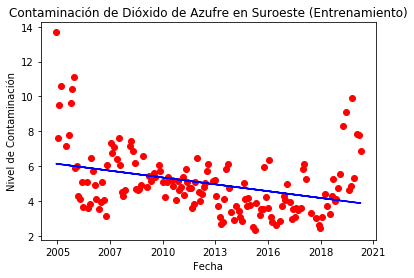

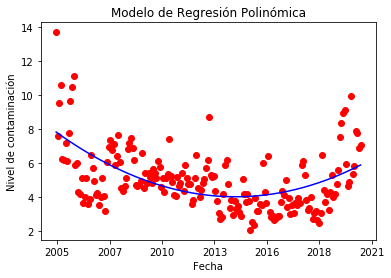

La predicción para la fecha ingresada: 2022-01-01 en la zona Suroeste fue de [3.72553086]

Regresión Lineal para Dióxido de Azufre (SO2) en Noroeste
Score del Modelo: 0.0449031863481274
Score del Modelo Polinomial: 0.3660596944258414
 ### Resultados ###
Conjunto de prueba (test)
[ 7.65725806  6.74731183  6.14247312  9.5327381   6.68951613 12.58333333
  9.1827957   8.26339286  6.30952381  9.7983871   9.71111111  5.5483871
  8.41801075  9.47849462  8.56451613 10.33333333 10.44109195  6.12365591
  5.3655914   4.45430108  7.29722222 10.61827957  6.13172043 12.52419355
 13.81989247  8.28333333  7.44722222  9.48655914  4.57638889 11.54973118
 11.71236559 10.06989247 17.02016129  6.69444444  8.8938172   9.75268817
 18.85694444 19.13575269  6.99166667]
Predicción
[ 9.19315673  9.6556256   8.51211223  9.36025315  8.98766189  9.69360206
 10.37464656  8.58975299  8.74376863 10.51558142 10.54174298  8.82014351
  8.57667221  8.42265657  8.55093261  8.46063303 10.1307533   9.75816204
  8.83322429  9

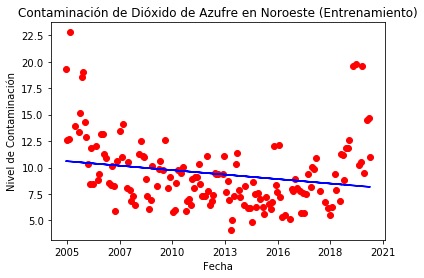

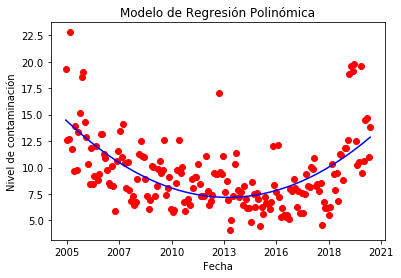

La predicción para la fecha ingresada: 2022-01-01 en la zona Noroeste fue de [7.99774219]

Regresión Lineal para Dióxido de Azufre (SO2) en Sureste
Score del Modelo: 0.23636718201266146
Score del Modelo Polinomial: 0.46970016313811375
 ### Resultados ###
Conjunto de prueba (test)
[3.21102151 4.07930108 2.36693548 4.41369048 2.81451613 5.59811828
 4.85887097 3.19345238 3.02827381 6.04973118 6.12777778 3.23790323
 2.47177419 4.62365591 2.86155914 4.67876344 4.875      4.31048387
 2.74865591 2.40322581 4.425      6.27688172 2.69489247 6.95430108
 5.86290323 3.65694444 3.65277778 5.51209677 2.18333333 7.03225806
 6.3561828  5.39784946 7.31854839 4.09583333 5.97446237 4.88306452
 6.41111111 8.61290323 3.33194444]
Predicción
[4.41294131 5.02827106 3.50678965 4.63526849 4.1395238  5.07879997
 5.98495162 3.61009319 3.81501596 6.17247    6.2072788  3.9166352
 3.59268879 3.38776602 3.55844142 3.43829492 5.66044378 5.1646991
 3.9340396  4.20801854 5.33537451 3.09638268 3.96828697 3.18228181
 3.02

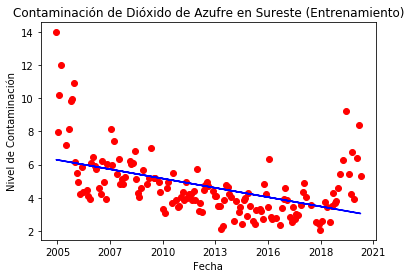

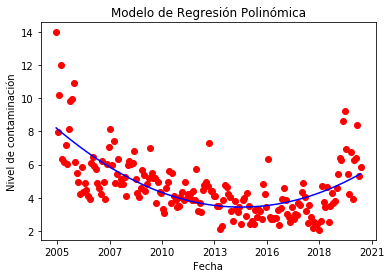

La predicción para la fecha ingresada: 2022-01-01 en la zona Sureste fue de [2.82240374]

Regresión Lineal para Dióxido de Azufre (SO2) en Centro
Score del Modelo: 0.08907920147699866
Score del Modelo Polinomial: 0.44234436002795763
 ### Resultados ###
Conjunto de prueba (test)
[ 4.60080645  5.3077957   4.12768817  6.27380952  4.17204301  8.43413978
  6.59331744  5.50297619  4.97321429  7.15994624  7.47638889  5.03494624
  4.30913978  6.16532258  5.69623656  7.41263441  7.20114943  5.46639785
  3.92204301  3.1438172   5.86388889  7.17741935  3.92876344  8.62096774
 10.54301075  5.57083333  5.57222222  7.60215054  3.24722222  7.54435484
  9.80241935  7.32123656  9.92876344  3.64583333  6.36021505  6.36424731
 11.58472222 14.78494624  3.9875    ]
Predicción
[6.18707708 6.72205156 5.39925883 6.38037078 5.94936489 6.76598194
 7.55380019 5.48907207 5.66723419 7.71683073 7.74709389 5.75558307
 5.47394049 5.29577837 5.44416545 5.33970876 7.27166949 6.8406636
 5.77071465 6.00891496 6.98905068 

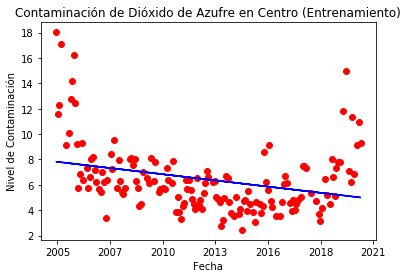

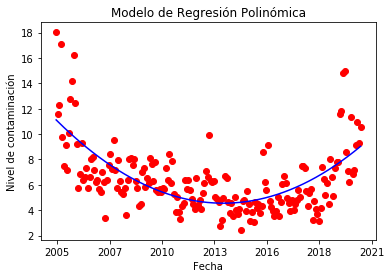

La predicción para la fecha ingresada: 2022-01-01 en la zona Centro fue de [4.80424617]


In [13]:
obtener_prediccion('2022-01-01')